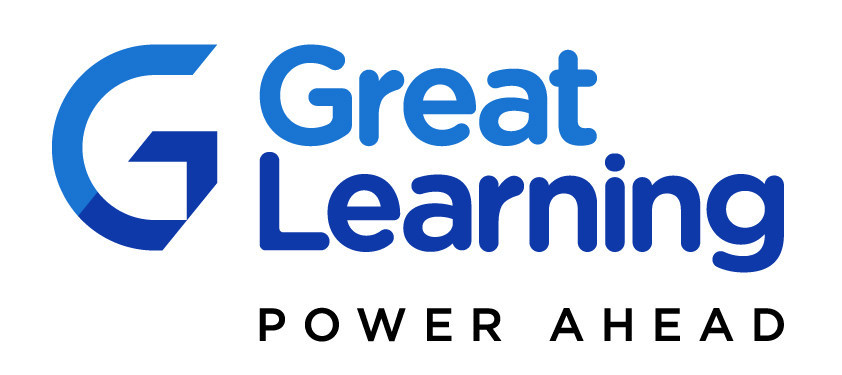

#**Prompt Engineering at Scale - Hands on Handbook**

###**Index:**
(A) Azure API Setup

(B) Zero Shot Prompt Code

(C) Few Shot Prompt Code

(D) Chain of Thought Prompt Code



<p align="right">
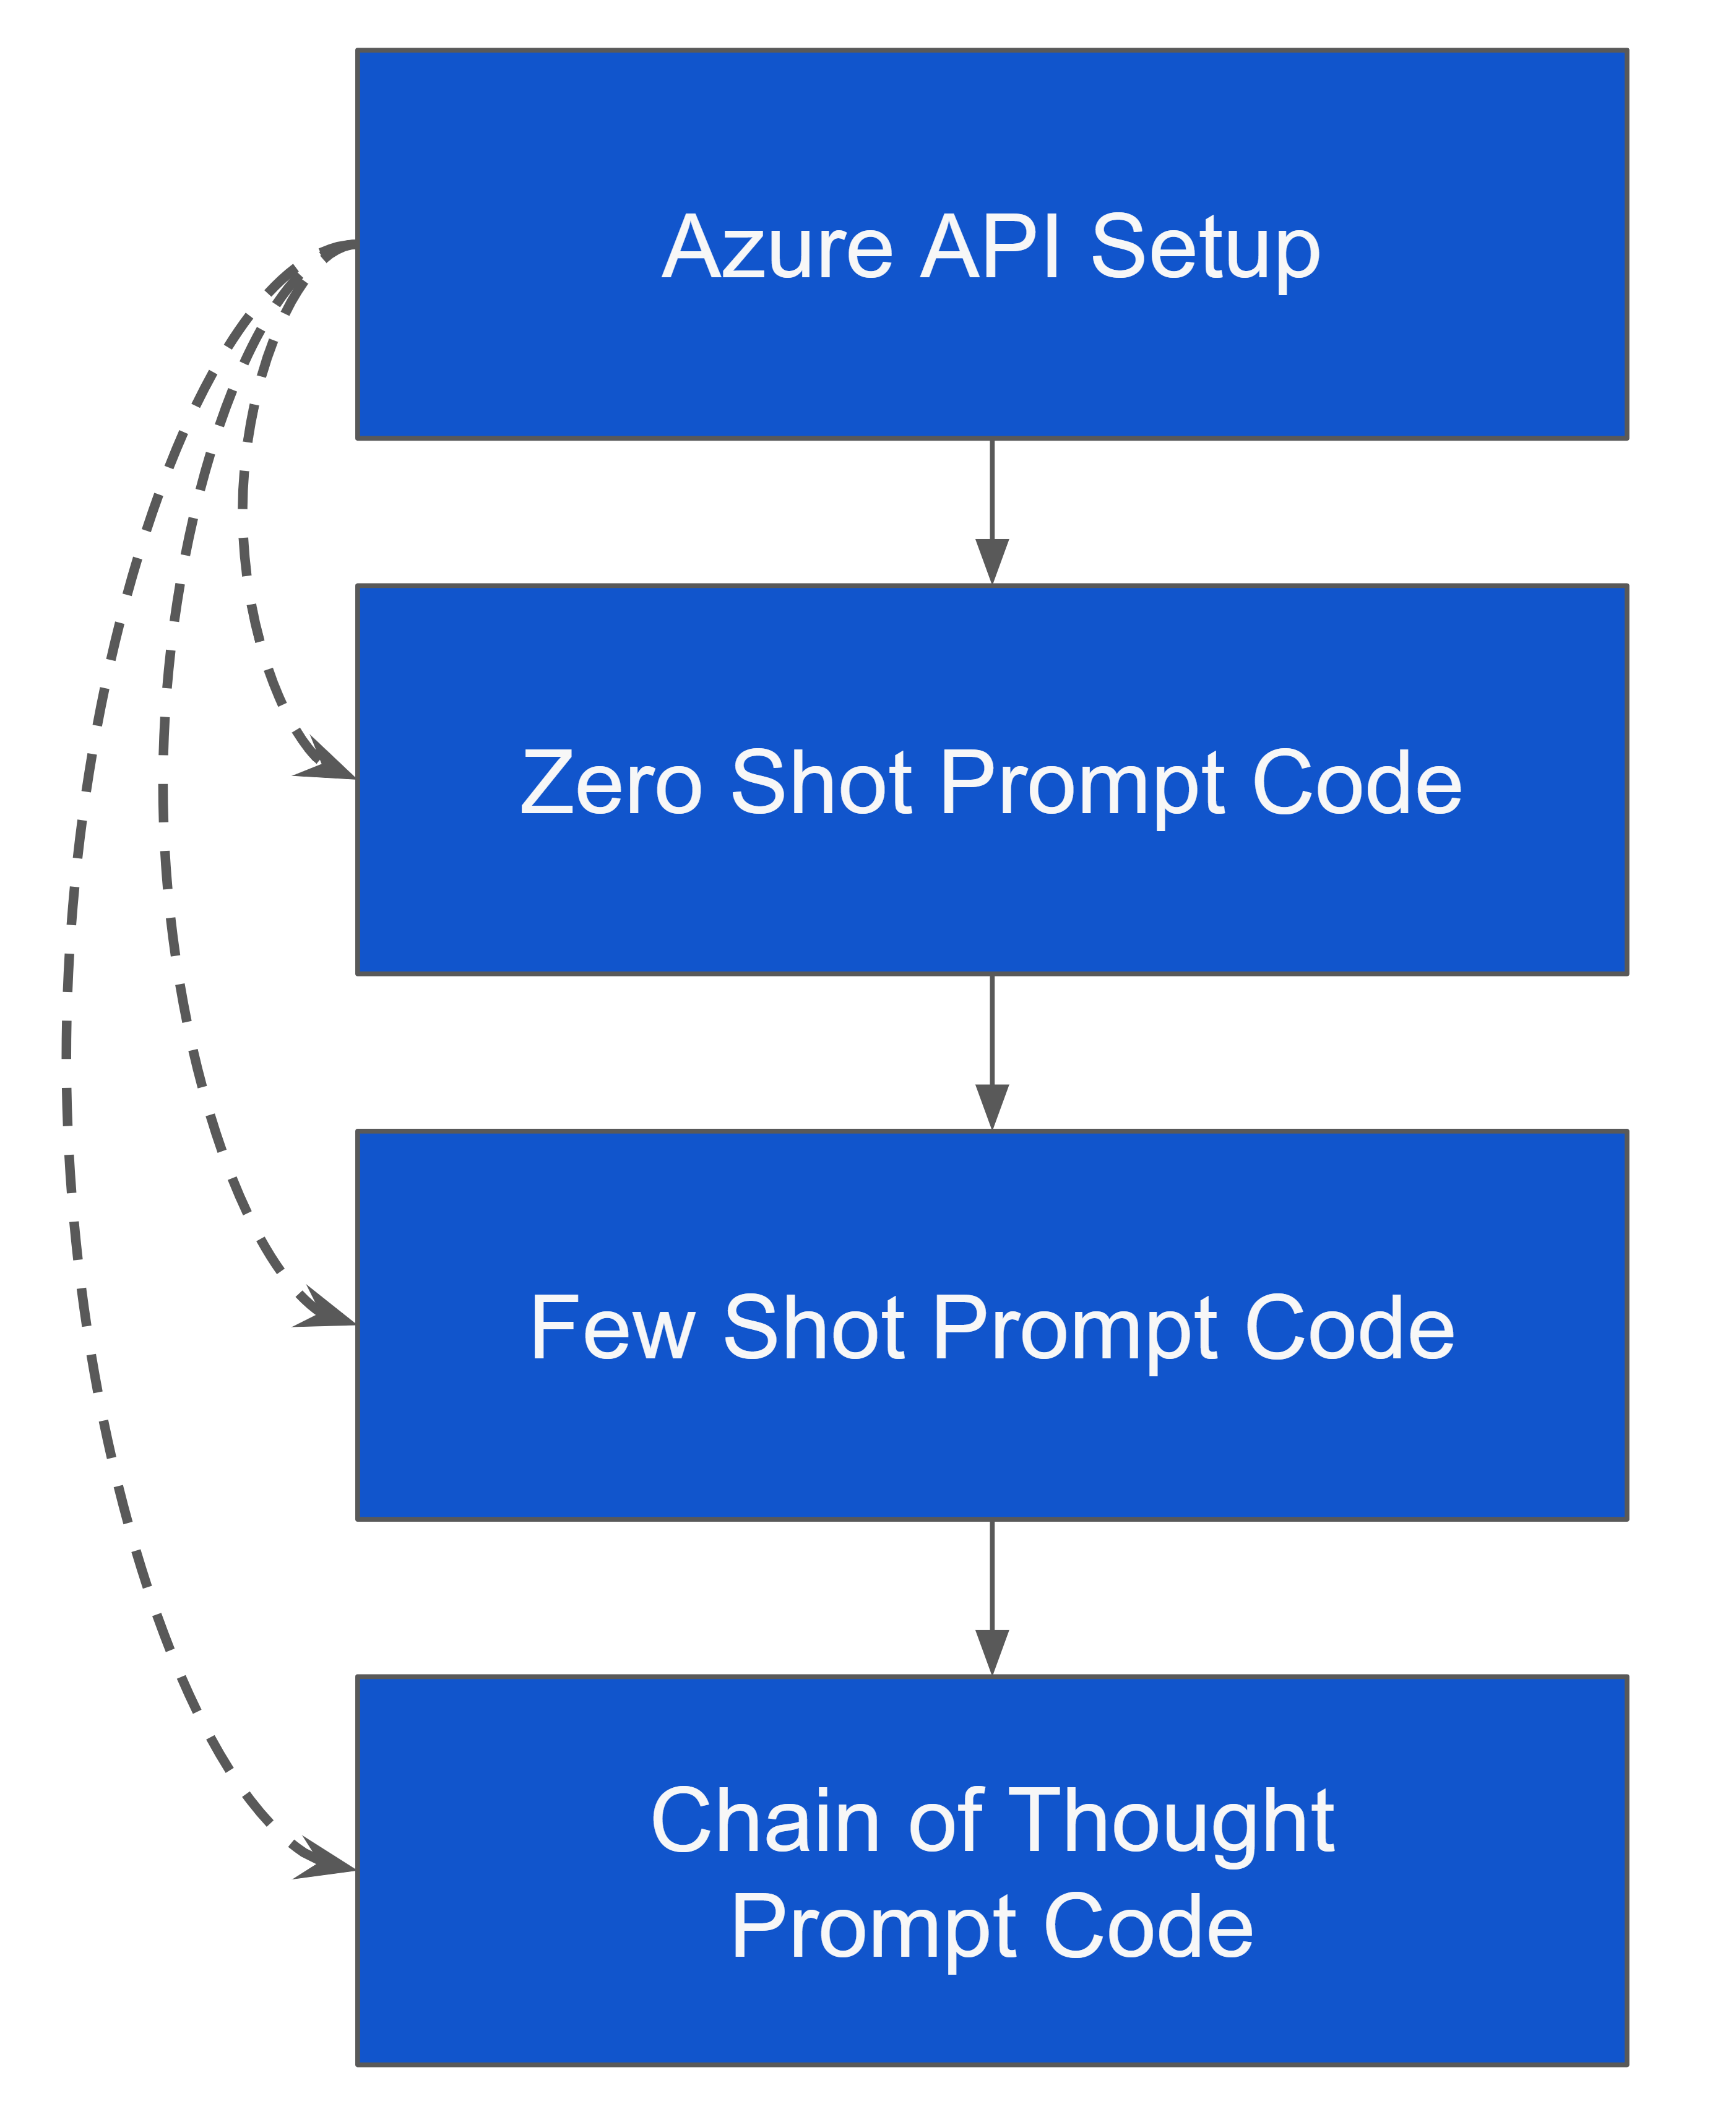
</p>

##**(A) Azure API Setup**

###**Steps to get Azure OpenAI Setup:**
1. Login to Azure
2. Extract Azure OpenAI API Key and Endpoint
3. Extract API Version and Deployment Name
4. Authentication


<p align="right">
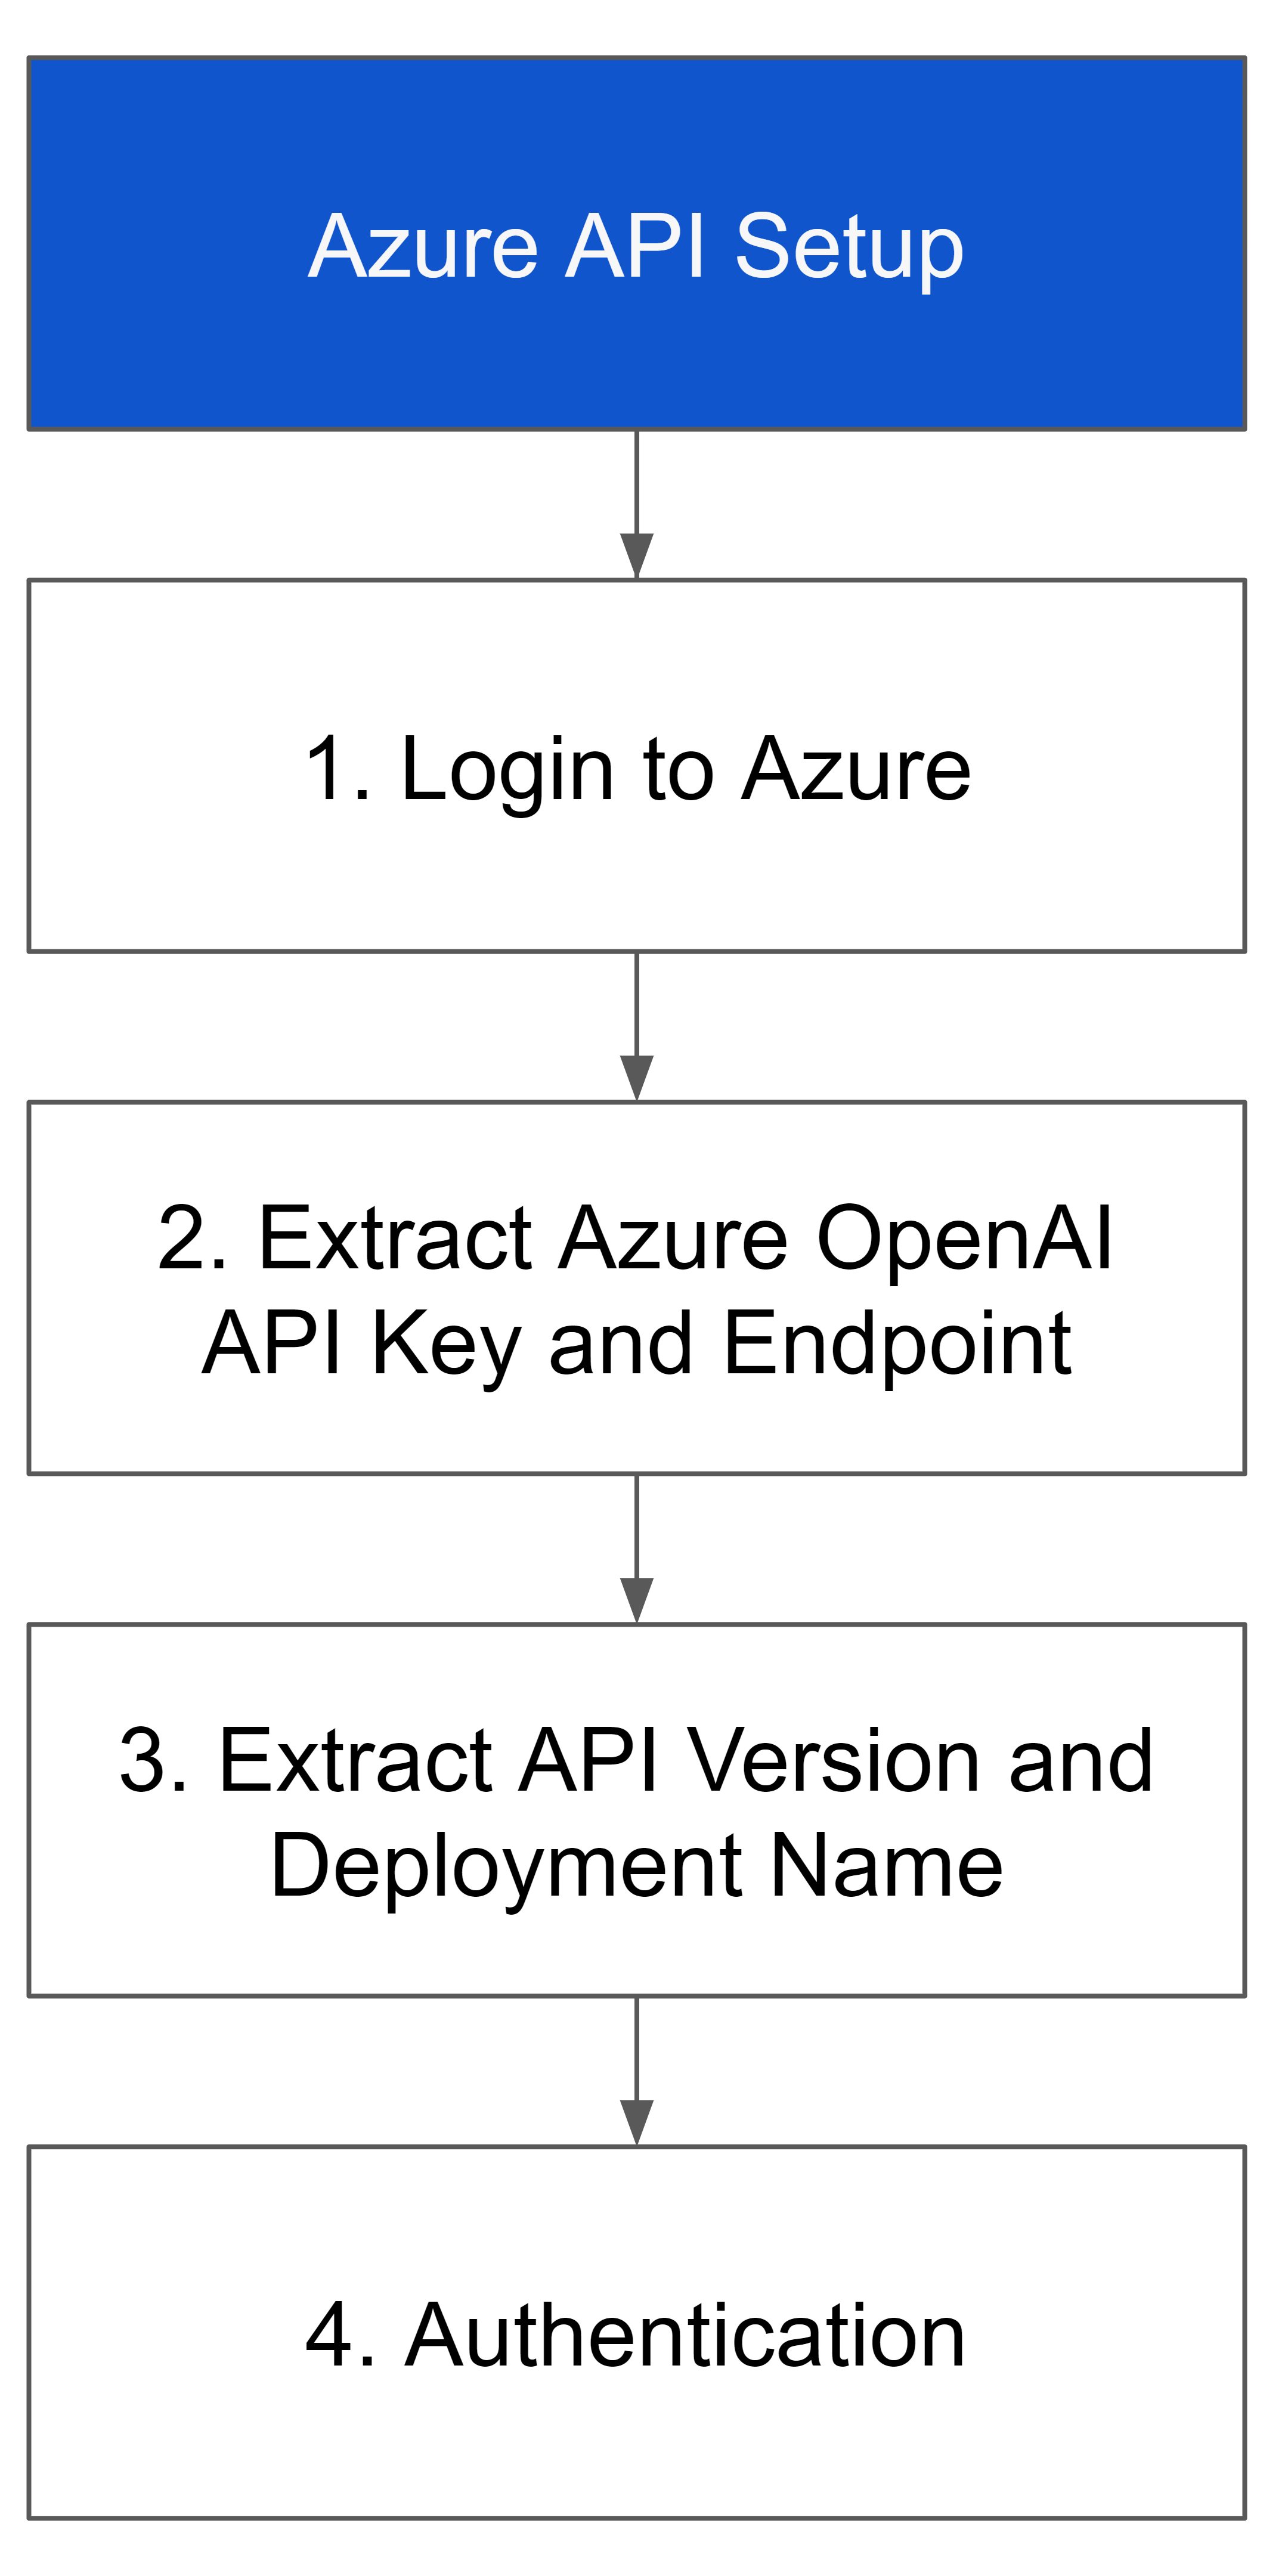

Steps 1, 2 and 3 are completed in Azure interface.Here we will focus on step 4: Authentication

###**4. Authentication**

###**4.1 Install and Import Necessary Libraries**

In [ ]:
!pip install openai==1.55.3 session-info --quiet
# Import all Python packages required to access the Azure Open AI API
from openai import AzureOpenAI
import json
import session_info

###**4.2 Write Credentials File**

Provide the 4 components input to config_data:

A) AZURE_OPENAI_KEY

B) AZURE_OPENAI_ENDPOINT

C) AZURE_OPENAI_APIVERSION

D) CHATGPT_MODEL

In [ ]:
config_data = {
    "AZURE_OPENAI_KEY": "your_openai_key",
    "AZURE_OPENAI_ENDPOINT": "your_openai_endpoint",
    "AZURE_OPENAI_APIVERSION": "your_openai_apiversion",
    "CHATGPT_MODEL": "your_chat_model_name"
}

file_path = 'config.json'  # Define the file path

with open(file_path, 'w') as json_file:
    json.dump(config_data, json_file, indent=4)

###**4.3 Access Config.json File in via Colab interface**

Once we've created the config.json file containing our OpenAI credentials, we can locate this and now download this file to avoid the need for creating it every time we start a session in Colab.

###**4.4 Read Credentials File**

In [ ]:
# Open and read the contents of the JSON file
with open(file_path, 'r') as json_file:
    creds= json.load(json_file)

# Credentials to authenticate to the personalized Open AI model server
client = AzureOpenAI(
 azure_endpoint=creds["AZURE_OPENAI_ENDPOINT"],
 api_key=creds["AZURE_OPENAI_KEY"],
 api_version=creds["AZURE_OPENAI_APIVERSION"]
)

# Deployment Nane of the Completion endpoint
deployment_name = creds["CHATGPT_MODEL"]

##**(B) Zero Shot Prompt Template Code**

###**Steps for Zero Shot Prompting:**
1. Setup Components of Prompt
2. Define Response Features
3. Extract the Outputs


<p align="right">
  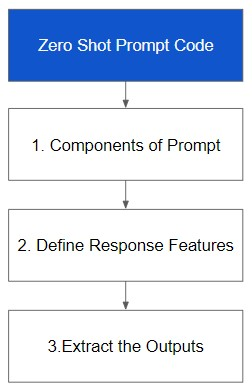
</p>


###**1. Setup Components of Prompt**

In [ ]:
system_message = """
Classify customer reviews in the input as positive or negative in sentiment.
Reviews will be delimited by triple backticks, that is, ```.
Do not explain your answer. Your answer should only contain the label: positive or negative.
"""
user_message_template = "```{review}```"
customer_review = """
I couldn't be happier with my experience at your store!The staff went above and beyond to assist me, providing exceptional customer service.
They were friendly, knowledgeable, and genuinely eager to help.The product I purchased exceeded my expectations and was exactly what I was looking for.
From start to finish, everything was seamless and enjoyable.I will definitely be returning and recommending your store to all my friends and family.
Thank you for making my shopping experience so wonderful!
"""
zero_shot_prompt = [
    {"role": "system", "content": system_message},
    {"role": "user", "content": user_message_template.format(review=customer_review)}
]

###**2. Define Response Features**

In [ ]:
response = client.chat.completions.create(
    model=deployment_name,
    messages=zero_shot_prompt,
    temperature=0
)

###**3. Extract the Outputs**

In [ ]:
print(f"Number of tokens in prompt: {response.usage.prompt_tokens}")

Number of tokens in prompt: 153


In [ ]:
print(f"Number of tokens in completion: {response.usage.completion_tokens}")

Number of tokens in completion: 1


In [ ]:
response.choices[0].message.content

'positive'

##**(C) Few Shot Prompt Template Code**

###**Steps for Few Shot Prompting:**
1. Setup Components of Prompt
2. Define Response Features
3. Extract the Outputs


<p align="right">
  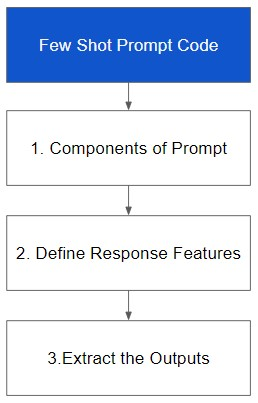
</p>

###**1. Setup Components of Prompt**

In [ ]:
system_message = """
Extract entities from customer reviews in the input.
Reviews will be delimited by triple backticks, that is, ```.
Do not explain your answer.
"""
user_message_template = "```{review}```"
user_input_example1 = """
Ordered grey which advertises green lighting, when you're going for a cheap aesthetic, it's upsetting. Mouse works fine.
"""
assistant_output_example1 = """
Entities: [Mouse]
"""
user_input_example2 = """
I bought one of these for PC gaming. Loved it, then bought another for work.This mouse is not on par with high end mouses from like the Logitech MX Master series, but at 1/5-/8th the price, I didn't expect that level of quality.
It does perform well, mouse wheel feels weighty, side buttons are well place with different textures so you can tell them apart.
DPI buttons are handy for adjusting between games, work jobs, etc.
The mouse does feel rather plasticky and cheap, but for the money, it about what I expected.I like a wired mouse to avoid the pointer/game jumping around due to latency.Long wire too, so snagging issues are minimized. Great value overall.
"""
assistant_output_example2 = """
Entities: [Mouse, Logitech MX Master, DPI Buttons, Mouse Wheel, Wire]
"""

new_review = """I had a old but very nice logitech lazer gamin mouse, my dog at the cord off it so had to get a replacement.
I was tempted to get another logitech because well I knew it was a sure thing.
Anyways I saw the reviews on this mouse and thought it looked awesome so I thought I would give it a try.
Well it does indeed look awesome and feels good in the hand.
My old mouse was weighted and kind of like the feel of the heft but I'm pleased with this new one and so long as it doesn't fail on me would say its definitely worth the price.
I would have had to play something like a First Person Shooter side by side to get a real idea how they compare on precision but this new mouse seems fine. Again my logitech was probably more than 10 years old so I can't compare to a new one.
If I had to guess they based the button placement, size and shape of this mouse off the logitech, don't know.
"""

In [ ]:
few_shot_examples = [
    {'role':'system', 'content': system_message},
    {'role':'user', 'content': user_message_template.format(review=user_input_example1)},
    {'role':'assistant', 'content': f"{assistant_output_example1}"},
    {'role':'user', 'content': user_message_template.format(review=user_input_example2)},
    {'role':'assistant', 'content': f"{assistant_output_example2}"}
]

few_shot_prompt = few_shot_examples + [
    {'role':'user', 'content': user_message_template.format(review=new_review)}
]

###**2. Define Response Features**

In [ ]:
response = client.chat.completions.create(
    model=deployment_name,
    messages=few_shot_prompt,
    temperature=0
)

###**3. Extract the Outputs**

In [ ]:
print(f"Number of tokens in prompt: {response.usage.prompt_tokens}")

Number of tokens in prompt: 475


In [ ]:
print(f"Number of tokens in completion: {response.usage.completion_tokens}")

Number of tokens in completion: 25


In [ ]:
response.choices[0].message.content

'Entities: [Logitech, Lazer Gamin Mouse, Cord, Replacement, First Person Shooter, Precision, Button Placement]'

##**(D) Chain of Thought Prompt Template Code**

###**Steps for Chain of Thought Prompting:**
1. Setup Components of Prompt
2. Define Response Features
3. Extract the Outputs


<p align="right">
  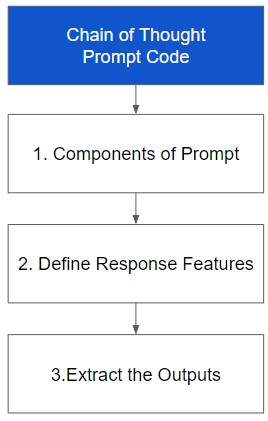
</p>

###**1. Setup Components of Prompt**

In [ ]:
system_message = """ You are an assistant that helps a customer service representatives from a mobile phone company to better understand customer complaints.
Customer complaints will be submitted as text delimited by triple backticks, that is, ```.
For each complaint, extract the following information and present it only in a JSON format:
1. phone_model: This is the name of the phone - if unknown, just say “UNKNOWN”
2. phone_price: The price in dollars - if unknown, assume it to be 1000 $
3. complaint_desc: A short description/summary of the complaint in less than 20 words
4. additional_charges: How much in dollars did the customer spend to fix the problem? - this should be an integer
5. refund_expected: TRUE or FALSE - check if the customer explicitly mentioned the word “refund” to tag as TRUE. If unknown, assume that the customer is not expecting a refund.
Take a step-by-step approach in your response, and give a detailed explanation before sharing your final answer in the following JSON format:
{phone_model:, phone_price:, complaint_desc:, additional_charges:, refund_expected:}.
"""
user_message_template = "```{complaint}```"

In [ ]:
customer_complaint = """
I am fuming with anger and regret over my purchase of the XUI890.
First, the price tag itself was exorbitant at 1500 $, making me expect exceptional quality.
Instead, it turned out to be a colossal disappointment.
The additional charges to fix its constant glitches and defects drained my wallet even more.
I spend 275 $ to get a new battery.
The final straw was when the phone's camera malfunctioned, and the repair cost was astronomical.
I demand a full refund and an apology for this abysmal product.
Returning it would be a relief, as this phone has become nothing but a money pit. Beware, fellow buyers!
"""

###**2. Define Response Features**

In [ ]:
response = client.chat.completions.create(
 model=deployment_name,
 messages=[
 {"role": "system", "content": system_message},
 {"role": "user", "content": user_message_template.format(complaint=customer_complaint)},
 ],
 temperature=0
)

###**3. Extract the Outputs**

In [ ]:
print(f"Number of tokens in prompt: {response.usage.prompt_tokens}")

Number of tokens in prompt: 377


In [ ]:
print(f"Number of tokens in completion: {response.usage.completion_tokens}")

Number of tokens in completion: 53


In [ ]:
print(response.choices[0].message.content)

{
  "phone_model": "XUI890",
  "phone_price": 1500,
  "complaint_desc": "Poor quality, constant glitches, expensive repairs",
  "additional_charges": 275,
  "refund_expected": true
}
